In [2]:
!pip install qiskit-nature

  Using cached qiskit_nature-0.7.2-py3-none-any.whl.metadata (8.0 kB)
Using cached qiskit_nature-0.7.2-py3-none-any.whl (2.2 MB)


In [3]:
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.formats.molecule_info import MoleculeInfo
from qiskit_nature.second_q.transformers import ActiveSpaceTransformer
# from qiskit_nature.second_q.mappers import ParityMapper, QubitConverter
from qiskit.algorithms.optimizers import SLSQP, SPSA
from qiskit.primitives import Estimator
from qiskit_nature.second_q.circuit.library import UCCSD
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
import time, datetime
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_nature.second_q.transformers import ActiveSpaceTransformer

from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import SLSQP
from qiskit.primitives import Estimator
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD


/tmp/ipykernel_300592/542831618.py:5: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.optimizers import SLSQP, SPSA


In [4]:
coordinates = {}

coordinates[0] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.004121, 1.705009, -0.796791)]
coordinates[1] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.0406, 1.73152, -0.818389)]
coordinates[2] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.077078, 1.758031, -0.839987)]
coordinates[3] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.113557, 1.784542, -0.861585)]
coordinates[4] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.150036, 1.811053, -0.883183)]
coordinates[5] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.186514, 1.837564, -0.904781)]
coordinates[6] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.222993, 1.864075, -0.926379)]
coordinates[7] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.259471, 1.890586, -0.947977)]
coordinates[8] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.29595, 1.917098, -0.969575)]
coordinates[9] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.332429, 1.943609, -0.991173)]
coordinates[10] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.368907, 1.97012, -1.012771)]
coordinates[11] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.405386, 1.996631, -1.034369)]
coordinates[12] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.441864, 2.023142, -1.055967)]
coordinates[13] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.478343, 2.049653, -1.077566)]
coordinates[14] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.514822, 2.076164, -1.099164)]
coordinates[15] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.5513, 2.102675, -1.120762)]
coordinates[16] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.587779, 2.129186, -1.14236)]
coordinates[17] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.624257, 2.155697, -1.163958)]
coordinates[18] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.660736, 2.182208, -1.185556)]
coordinates[19] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.697215, 2.208719, -1.207154)]
coordinates[20] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.733693, 2.23523, -1.228752)]
coordinates[21] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.770172, 2.261741, -1.25035)]
coordinates[22] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.80665, 2.288252, -1.271948)]
coordinates[23] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.843129, 2.314763, -1.293546)]
coordinates[24] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.879608, 2.341274, -1.315144)]

In [5]:
def calc_VQE(num_electrons, num_spatial_orbitals):
    energies = []
    for i in range(len(coordinates)):
        print(f"========================{i}========================")
        driver = PySCFDriver.from_molecule(
            MoleculeInfo(["N", "H", "H", "N", "H", "H"], 
            coordinates[i],
            charge=0,
            multiplicity=1),
            basis='631g*'
            # basis='631+g**'
        )
        problem = driver.run()
        # print(problem.num_particles)
        # print(problem.num_spatial_orbitals)

        transformer = ActiveSpaceTransformer(num_electrons=num_electrons, num_spatial_orbitals=num_spatial_orbitals)
        transformed_problem = transformer.transform(problem)
        # print(transformed_problem.num_particles)
        # print(transformed_problem.num_spatial_orbitals)

        mapper = JordanWignerMapper()

        ansatz = UCCSD(
        transformed_problem.num_spatial_orbitals,
        transformed_problem.num_particles,
        mapper,
        initial_state=HartreeFock(
            transformed_problem.num_spatial_orbitals,
            transformed_problem.num_particles,
            mapper,
            ),
        )

        vqe_solver = VQE(Estimator(), ansatz, SLSQP())
        vqe_solver.initial_point = [0.0] * ansatz.num_parameters

        calc = GroundStateEigensolver(mapper, vqe_solver)
        res = calc.solve(transformed_problem)
        print(res)
        energies.append(res.total_energies[0])
    
    return energies

In [6]:
energies_2_2 = calc_VQE(2,2)

========================0========================
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -153.2170791502
  - computed part:      -1.213026154108
  - ActiveSpaceTransformer extracted energy part: -152.004052996092
~ Nuclear repulsion energy (Hartree): 42.126026082572
> Total ground state energy (Hartree): -111.091053067628
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: 0.000 S^2: 0.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [-7.34632354  23.60807068  -5.3027567]
 
  0: 
  * Electronic dipole moment (a.u.): [-8.287720502671  22.905471898949  -6.057548883357]
    - computed part:      [-1.487610041643  2.01078824494  -1.124078539461]
    - ActiveSpaceTransformer extracted energy part: [-6.800110461029  20.894683654008  -4.933470343897]
  > Dipole moment (a.u.): [0.941396962671  0.702598781051  0.754792183357]  Total: 1.396275233799
                 (debye): [2.392792181797  1.785827803681  1.918490187278]  Total

In [7]:
energies_2_2

[-111.09105306762794,
 -111.12055515397967,
 -111.13831168396315,
 -111.1474497714184,
 -111.150290132986,
 -111.14856244843727,
 -111.14356048463068,
 -111.13625751895722,
 -111.12739097280084,
 -111.1175252357778,
 -111.10709624192029,
 -111.09644431553048,
 -111.08584477124094,
 -111.07553134442897,
 -111.06571473522541,
 -111.05659167707314,
 -111.04834374355808,
 -111.04112410971656,
 -111.03503056772573,
 -111.03008441546123,
 -111.02622110129914,
 -111.02330530425617,
 -111.02116137471751,
 -111.01960762839906,
 -111.018480670135]

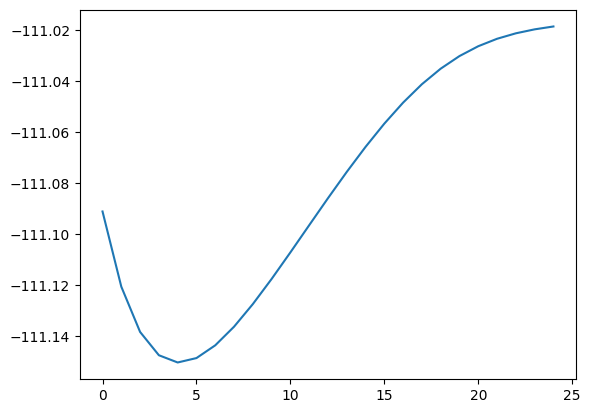

In [8]:
import matplotlib.pyplot as plt
plt.plot(energies_2_2)

In [9]:
file_path = f"data/Trans_VQE_2_2.txt"
# Open the file in write mode
with open(file_path, "w") as file:
    # Write each element of the array to a new line
    for element in energies_2_2:
        file.write(str(element) + "\n")

In [11]:
def calc_VQE(num_electrons, num_spatial_orbitals):
    energies = []
    for i in range(1):
        print(f"========================{i}========================")
        driver = PySCFDriver.from_molecule(
            MoleculeInfo(["N", "H", "H", "N", "H", "H"], 
            coordinates[i],
            charge=0,
            multiplicity=1),
            basis='631g*'
            # basis='631+g**'
        )
        problem = driver.run()
        # print(problem.num_particles)
        # print(problem.num_spatial_orbitals)

        transformer = ActiveSpaceTransformer(num_electrons=num_electrons, num_spatial_orbitals=num_spatial_orbitals)
        transformed_problem = transformer.transform(problem)
        # print(transformed_problem.num_particles)
        # print(transformed_problem.num_spatial_orbitals)

        mapper = JordanWignerMapper()

        ansatz = UCCSD(
        transformed_problem.num_spatial_orbitals,
        transformed_problem.num_particles,
        mapper,
        initial_state=HartreeFock(
            transformed_problem.num_spatial_orbitals,
            transformed_problem.num_particles,
            mapper,
            ),
        )

        vqe_solver = VQE(Estimator(), ansatz, SLSQP())
        vqe_solver.initial_point = [0.0] * ansatz.num_parameters

        calc = GroundStateEigensolver(mapper, vqe_solver)
        res = calc.solve(transformed_problem)
        print(res)
        energies.append(res.total_energies[0])
    
    return energies

energies_2_2 = calc_VQE(2,2)

========================0========================
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -153.217079150195
  - computed part:      -1.213026154104
  - ActiveSpaceTransformer extracted energy part: -152.004052996092
~ Nuclear repulsion energy (Hartree): 42.126026082572
> Total ground state energy (Hartree): -111.091053067623
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: 0.000 S^2: 0.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [-7.34632354  23.60807068  -5.3027567]
 
  0: 
  * Electronic dipole moment (a.u.): [-8.287720537644  22.905471932178  -6.057548896379]
    - computed part:      [-1.487610076616  2.01078827817  -1.124078552482]
    - ActiveSpaceTransformer extracted energy part: [-6.800110461029  20.894683654008  -4.933470343897]
  > Dipole moment (a.u.): [0.941396997644  0.702598747822  0.754792196379]  Total: 1.396275247696
                 (debye): [2.392792270689  1.78582771922  1.918490220376]  Tota